# Overview Description of the Project

# Setting Up Project Environment in Kaggle

In [144]:
!pip install jovian --upgrade --quiet
import jovian
project_name = "zero-to-gans-project"
jovian.commit(project = project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ai/alanwarr/zero-to-gans-project


<IPython.core.display.Javascript object>

# The dataset 10-monkey-species was added from Kaggle repository of datasets

See https://www.kaggle.com/slothkong/10-monkey-species for details of dataset.

# Explore and transform the dataset

In [145]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/10-monkey-species/monkey_labels.txt
/kaggle/input/10-monkey-species/validation/validation/n8/n816.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n810.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n8016.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n809.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n801.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n806.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n804.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n811.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n815.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n813.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n8011.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n8012.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n8031.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n8015.jpg
/kaggle/input/10-monk

/kaggle/input/10-monkey-species/training/training/n0/n0166.jpg
/kaggle/input/10-monkey-species/training/training/n0/n0046.jpg
/kaggle/input/10-monkey-species/training/training/n0/n0125.jpg
/kaggle/input/10-monkey-species/training/training/n0/n0155.jpg
/kaggle/input/10-monkey-species/training/training/n0/n0027.jpg
/kaggle/input/10-monkey-species/training/training/n0/n0111.jpg
/kaggle/input/10-monkey-species/training/training/n0/n0144.jpg
/kaggle/input/10-monkey-species/training/training/n0/n0128.jpg
/kaggle/input/10-monkey-species/training/training/n0/n0118.jpg
/kaggle/input/10-monkey-species/training/training/n0/n0052.jpg
/kaggle/input/10-monkey-species/training/training/n0/n0149.jpg
/kaggle/input/10-monkey-species/training/training/n0/n0051.jpg
/kaggle/input/10-monkey-species/training/training/n0/n0148.jpg
/kaggle/input/10-monkey-species/training/training/n0/n0040.jpg
/kaggle/input/10-monkey-species/training/training/n0/n0168.jpg
/kaggle/input/10-monkey-species/training/training/n0/n0

In [146]:
import os
import torch
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, random_split, DataLoader
from PIL import Image
import torchvision.models as models
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import torchvision.transforms as tt
from sklearn.metrics import f1_score
import torch.nn.functional as F
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader
%matplotlib inline

In [147]:
data_dir = '../input/10-monkey-species'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/validation/validation")
print(classes)

['validation', 'training', 'monkey_labels.txt']
['n8', 'n6', 'n7', 'n1', 'n0', 'n2', 'n5', 'n4', 'n9', 'n3']


In [148]:
train_tfms = tt.Compose([tt.CenterCrop(512),
                         tt.ToTensor()])
valid_tfms = tt.Compose([tt.CenterCrop(512), tt.ToTensor()])

In [149]:
train_ds = ImageFolder(data_dir+'/training/training', train_tfms)

val_ds = ImageFolder(data_dir+'/validation/validation', valid_tfms)

In [150]:
img, label = train_ds[0]
print(img.shape, label)
img

torch.Size([3, 512, 512]) 0


tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [151]:
print(train_ds.classes)

['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']


In [152]:
print(val_ds.classes)

['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']


In [153]:
import matplotlib.pyplot as plt

def show_example(img, label):
    print('Label: ', train_ds.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  n0 (0)


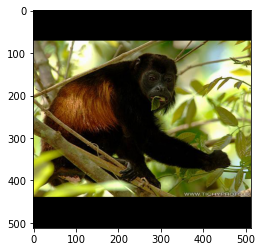

In [154]:
show_example(*train_ds[0])

images.shape: torch.Size([128, 3, 512, 512])


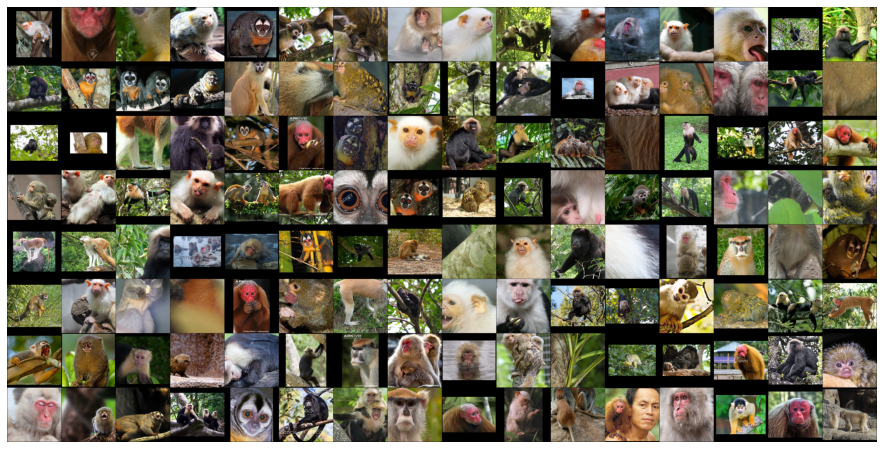

In [155]:
batch_size=128
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [156]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# Applying Logistic Regression on the 10 Monkey Species Dataset

In [157]:
class MnistModel(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size)
        
    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [158]:
input_size = 786432
hidden_size = 128
num_classes = 10

In [159]:
model = MnistModel(input_size, hidden_size=56, out_size=num_classes)

In [160]:
for t in model.parameters():
    print(t.shape)
torch.Size([128, 786432])
torch.Size([128])
torch.Size([10, 128])
torch.Size([10])

torch.Size([56, 786432])
torch.Size([56])
torch.Size([10, 56])
torch.Size([10])


torch.Size([10])

In [161]:
for images, labels in train_loader:
    outputs = model(images)
    loss = F.cross_entropy(outputs, labels)
    print('Loss:', loss.item())
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

Loss: 2.314910650253296
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.0178,  0.0600, -0.0894, -0.2037,  0.1249, -0.2328,  0.1344, -0.1009,
          0.1082,  0.1651],
        [ 0.0972,  0.1944, -0.1631, -0.1811,  0.1436, -0.1836,  0.0589, -0.0289,
          0.0855,  0.1199]])


In [162]:
torch.cuda.is_available()

True

In [163]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [164]:
device = get_default_device()
device

device(type='cuda')

In [165]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [166]:
for images, labels in train_loader:
    print(images.shape)
    images = to_device(images, device)
    print(images.device)
    break

torch.Size([128, 3, 512, 512])
cuda:0


In [167]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [168]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

In [169]:
for xb, yb in val_loader:
    print('xb.device:', xb.device)
    print('yb:', yb)
    break

xb.device: cuda:0
yb: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], device='cuda:0')


In [170]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [171]:
model = MnistModel(input_size, hidden_size=hidden_size, out_size=num_classes)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=786432, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=10, bias=True)
)

In [172]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 2.2489867210388184, 'val_acc': 0.275390625}]

In [173]:
history += fit(50, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 2.1903, val_acc: 0.0859
Epoch [1], val_loss: 2.2731, val_acc: 0.0879
Epoch [2], val_loss: 2.3592, val_acc: 0.1230
Epoch [3], val_loss: 2.2877, val_acc: 0.1133
Epoch [4], val_loss: 2.3519, val_acc: 0.1152
Epoch [5], val_loss: 2.0052, val_acc: 0.3672
Epoch [6], val_loss: 2.2402, val_acc: 0.0820
Epoch [7], val_loss: 1.9167, val_acc: 0.3457
Epoch [8], val_loss: 2.0787, val_acc: 0.2480
Epoch [9], val_loss: 2.0449, val_acc: 0.2168
Epoch [10], val_loss: 1.8292, val_acc: 0.4551
Epoch [11], val_loss: 2.1272, val_acc: 0.2441
Epoch [12], val_loss: 1.9671, val_acc: 0.3203
Epoch [13], val_loss: 1.9509, val_acc: 0.3203
Epoch [14], val_loss: 2.0178, val_acc: 0.2578
Epoch [15], val_loss: 1.7293, val_acc: 0.4961
Epoch [16], val_loss: 1.8642, val_acc: 0.3691
Epoch [17], val_loss: 2.2225, val_acc: 0.2168
Epoch [18], val_loss: 1.8628, val_acc: 0.3555
Epoch [19], val_loss: 1.9453, val_acc: 0.2891
Epoch [20], val_loss: 1.9474, val_acc: 0.2422
Epoch [21], val_loss: 1.9137, val_acc: 0.232

In [174]:
import matplotlib.pyplot as plt
%matplotlib inline

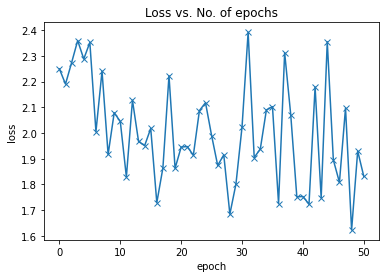

In [175]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

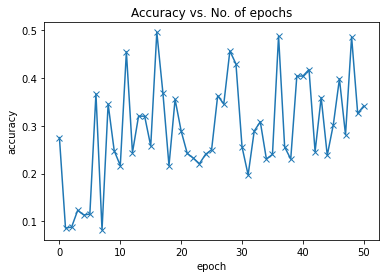

In [176]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [177]:
test_dataset = ImageFolder(data_dir+'/validation/validation', valid_tfms)

In [178]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return train_ds.classes[preds[0].item()]

Label: n0 , Predicted: n9
Actual:  mantled_howler Predicted:  nilgiri_langur


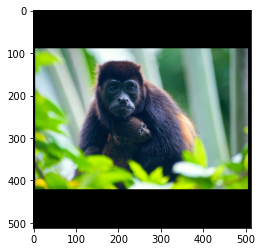

In [179]:
img, label = test_dataset[0]
if label == 0: display_name = "mantled_howler"
if label == 1: display_name = "patas_monkey"
if label == 2: display_name = "bald_uakari"
if label == 3: display_name = "japanese_macaque"
if label == 4: display_name = "pygmy_marmoset"
if label == 5: display_name = "white_headed_capuchin"
if label == 6: display_name = "silvery_marmoset"
if label == 7: display_name = "common_squirrel_monkey"
if label == 8: display_name = "black_headed_night_monkey"
if label == 9: display_name = "nilgiri_langur"
if predict_image(img, model) == "n0": predicted_name = "mantled_howler"
if predict_image(img, model) == "n1": predicted_name = "patas_monkey"
if predict_image(img, model) == "n2": predicted_name = "bald_uakari"
if predict_image(img, model) == "n3": predicted_name = "japanese_macaque"
if predict_image(img, model) == "n4": predicted_name = "pygmy_marmoset"
if predict_image(img, model) == "n5": predicted_name = "white_headed_capuchin"
if predict_image(img, model) == "n6": predicted_name = "silvery_marmoset"
if predict_image(img, model) == "n7": predicted_name = "common_squirrel_monkey"
if predict_image(img, model) == "n8": predicted_name = "black_headed_night_monkey"
if predict_image(img, model) == "n9": predicted_name = "nilgiri_langur"   
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))
print('Actual: ', display_name, 'Predicted: ', predicted_name)

Label: n3 , Predicted: n3
Actual:  japanese_macaque Predicted:  japanese_macaque


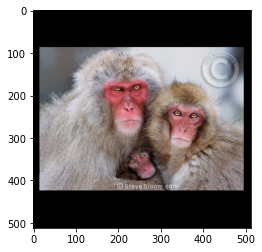

In [180]:
img, label = test_dataset[100]
if label == 0: display_name = "mantled_howler"
if label == 1: display_name = "patas_monkey"
if label == 2: display_name = "bald_uakari"
if label == 3: display_name = "japanese_macaque"
if label == 4: display_name = "pygmy_marmoset"
if label == 5: display_name = "white_headed_capuchin"
if label == 6: display_name = "silvery_marmoset"
if label == 7: display_name = "common_squirrel_monkey"
if label == 8: display_name = "black_headed_night_monkey"
if label == 9: display_name = "nilgiri_langur"
if predict_image(img, model) == "n0": predicted_name = "mantled_howler"
if predict_image(img, model) == "n1": predicted_name = "patas_monkey"
if predict_image(img, model) == "n2": predicted_name = "bald_uakari"
if predict_image(img, model) == "n3": predicted_name = "japanese_macaque"
if predict_image(img, model) == "n4": predicted_name = "pygmy_marmoset"
if predict_image(img, model) == "n5": predicted_name = "white_headed_capuchin"
if predict_image(img, model) == "n6": predicted_name = "silvery_marmoset"
if predict_image(img, model) == "n7": predicted_name = "common_squirrel_monkey"
if predict_image(img, model) == "n8": predicted_name = "black_headed_night_monkey"
if predict_image(img, model) == "n9": predicted_name = "nilgiri_langur"   
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))
print('Actual: ', display_name, 'Predicted: ', predicted_name)

Label: n7 , Predicted: n5
Actual:  common_squirrel_monkey Predicted:  white_headed_capuchin


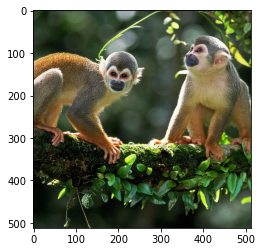

In [181]:
img, label = test_dataset[200]
if label == 0: display_name = "mantled_howler"
if label == 1: display_name = "patas_monkey"
if label == 2: display_name = "bald_uakari"
if label == 3: display_name = "japanese_macaque"
if label == 4: display_name = "pygmy_marmoset"
if label == 5: display_name = "white_headed_capuchin"
if label == 6: display_name = "silvery_marmoset"
if label == 7: display_name = "common_squirrel_monkey"
if label == 8: display_name = "black_headed_night_monkey"
if label == 9: display_name = "nilgiri_langur"
if predict_image(img, model) == "n0": predicted_name = "mantled_howler"
if predict_image(img, model) == "n1": predicted_name = "patas_monkey"
if predict_image(img, model) == "n2": predicted_name = "bald_uakari"
if predict_image(img, model) == "n3": predicted_name = "japanese_macaque"
if predict_image(img, model) == "n4": predicted_name = "pygmy_marmoset"
if predict_image(img, model) == "n5": predicted_name = "white_headed_capuchin"
if predict_image(img, model) == "n6": predicted_name = "silvery_marmoset"
if predict_image(img, model) == "n7": predicted_name = "common_squirrel_monkey"
if predict_image(img, model) == "n8": predicted_name = "black_headed_night_monkey"
if predict_image(img, model) == "n9": predicted_name = "nilgiri_langur"   
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))
print('Actual: ', display_name, 'Predicted: ', predicted_name)

In [182]:
jovian.commit(project = project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ai/alanwarr/zero-to-gans-project


<IPython.core.display.Javascript object>

# Applying CNN Model on the 10 Monkey Species Dataset

In [183]:
train_tfms = tt.Compose([tt.CenterCrop(512),
                         tt.Resize(32),
                         tt.ToTensor()])
valid_tfms = tt.Compose([tt.CenterCrop(512), tt.Resize(32),tt.ToTensor()])

train_ds = ImageFolder(data_dir+'/training/training', train_tfms)
val_ds = ImageFolder(data_dir+'/validation/validation', valid_tfms)

In [184]:
img, label = train_ds[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [185]:
def apply_kernel(image, kernel):
    ri, ci = image.shape       # image dimensions
    rk, ck = kernel.shape      # kernel dimensions
    ro, co = ri-rk+1, ci-ck+1  # output dimensions
    output = torch.zeros([ro, co])
    for i in range(ro): 
        for j in range(co):
            output[i,j] = torch.sum(image[i:i+rk,j:j+ck] * kernel)
    return output

In [186]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0], 
    [0, 0, 1, 3, 1], 
    [3, 1, 2, 2, 3], 
    [2, 0, 0, 2, 2], 
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2], 
    [2, 2, 0], 
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

In [187]:
random_seed = 42
torch.manual_seed(random_seed);

In [188]:
from torch.utils.data.dataloader import DataLoader

batch_size=128

In [189]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

In [190]:
def apply_kernel(image, kernel):
    ri, ci = image.shape       # image dimensions
    rk, ck = kernel.shape      # kernel dimensions
    ro, co = ri-rk+1, ci-ck+1  # output dimensions
    output = torch.zeros([ro, co])
    for i in range(ro): 
        for j in range(co):
            output[i,j] = torch.sum(image[i:i+rk,j:j+ck] * kernel)
    return output

In [191]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0], 
    [0, 0, 1, 3, 1], 
    [3, 1, 2, 2, 3], 
    [2, 0, 0, 2, 2], 
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2], 
    [2, 2, 0], 
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

In [192]:
import torch.nn as nn
import torch.nn.functional as F

In [193]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2, 2)
)

In [194]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = simple_model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 8, 16, 16])


In [195]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [196]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1), #input size
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1), #input size (first number)
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
        
    def forward(self, xb):
        return self.network(xb)

In [197]:
model = Cifar10CnnModel()
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [198]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 10])
out[0]: tensor([ 0.0205,  0.0084,  0.0148, -0.0398,  0.0139, -0.0334,  0.0092,  0.0092,
         0.0290, -0.0291], grad_fn=<SelectBackward>)


In [199]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [200]:
device = get_default_device()
device

device(type='cuda')

In [201]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

In [202]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [203]:
model = to_device(Cifar10CnnModel(), device)

In [204]:
evaluate(model, val_dl)

{'val_loss': 2.308480739593506, 'val_acc': 0.05078125}

In [205]:
num_epochs = 50
opt_func = torch.optim.Adam
lr = 0.001

In [206]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 2.3044, val_loss: 2.3117, val_acc: 0.0625
Epoch [1], train_loss: 2.2680, val_loss: 2.2696, val_acc: 0.0586
Epoch [2], train_loss: 2.2869, val_loss: 2.2895, val_acc: 0.0684
Epoch [3], train_loss: 2.2324, val_loss: 2.2420, val_acc: 0.0918
Epoch [4], train_loss: 2.1718, val_loss: 2.2082, val_acc: 0.1172
Epoch [5], train_loss: 2.0987, val_loss: 2.1138, val_acc: 0.1172
Epoch [6], train_loss: 2.0578, val_loss: 2.2778, val_acc: 0.1387
Epoch [7], train_loss: 2.0220, val_loss: 2.0726, val_acc: 0.1289
Epoch [8], train_loss: 1.9877, val_loss: 2.0083, val_acc: 0.1465
Epoch [9], train_loss: 1.9654, val_loss: 2.1652, val_acc: 0.1367
Epoch [10], train_loss: 1.9296, val_loss: 1.9683, val_acc: 0.2188
Epoch [11], train_loss: 1.8870, val_loss: 1.9819, val_acc: 0.1758
Epoch [12], train_loss: 1.8314, val_loss: 1.8324, val_acc: 0.3027
Epoch [13], train_loss: 1.8040, val_loss: 1.9139, val_acc: 0.3066
Epoch [14], train_loss: 1.7315, val_loss: 2.0140, val_acc: 0.1914
Epoch [15], train_lo

In [207]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

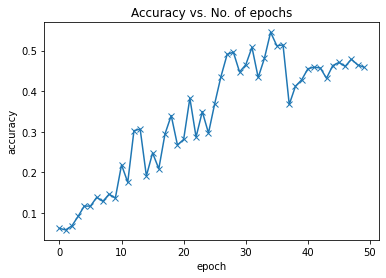

In [208]:
plot_accuracies(history)

In [209]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

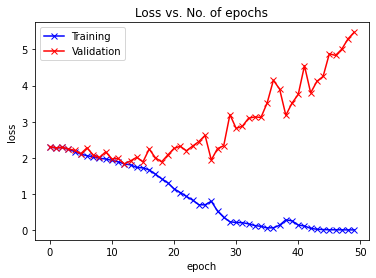

In [210]:
plot_losses(history)

# Testing CNN Model with individual images

In [211]:
test_dataset = ImageFolder(data_dir+'/validation/validation', valid_tfms)

In [212]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_ds.classes[preds[0].item()]

Label: n0 , Predicted: n9
Actual:  mantled_howler Predicted:  nilgiri_langur


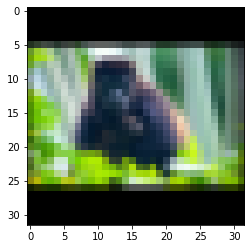

In [213]:
img, label = test_dataset[0]
if label == 0: display_name = "mantled_howler"
if label == 1: display_name = "patas_monkey"
if label == 2: display_name = "bald_uakari"
if label == 3: display_name = "japanese_macaque"
if label == 4: display_name = "pygmy_marmoset"
if label == 5: display_name = "white_headed_capuchin"
if label == 6: display_name = "silvery_marmoset"
if label == 7: display_name = "common_squirrel_monkey"
if label == 8: display_name = "black_headed_night_monkey"
if label == 9: display_name = "nilgiri_langur"
if predict_image(img, model) == "n0": predicted_name = "mantled_howler"
if predict_image(img, model) == "n1": predicted_name = "patas_monkey"
if predict_image(img, model) == "n2": predicted_name = "bald_uakari"
if predict_image(img, model) == "n3": predicted_name = "japanese_macaque"
if predict_image(img, model) == "n4": predicted_name = "pygmy_marmoset"
if predict_image(img, model) == "n5": predicted_name = "white_headed_capuchin"
if predict_image(img, model) == "n6": predicted_name = "silvery_marmoset"
if predict_image(img, model) == "n7": predicted_name = "common_squirrel_monkey"
if predict_image(img, model) == "n8": predicted_name = "black_headed_night_monkey"
if predict_image(img, model) == "n9": predicted_name = "nilgiri_langur"   
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))
print('Actual: ', display_name, 'Predicted: ', predicted_name)

Label: n3 , Predicted: n3
Actual:  japanese_macaque Predicted:  japanese_macaque


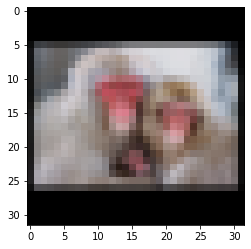

In [214]:
img, label = test_dataset[100]
if label == 0: display_name = "mantled_howler"
if label == 1: display_name = "patas_monkey"
if label == 2: display_name = "bald_uakari"
if label == 3: display_name = "japanese_macaque"
if label == 4: display_name = "pygmy_marmoset"
if label == 5: display_name = "white_headed_capuchin"
if label == 6: display_name = "silvery_marmoset"
if label == 7: display_name = "common_squirrel_monkey"
if label == 8: display_name = "black_headed_night_monkey"
if label == 9: display_name = "nilgiri_langur"
if predict_image(img, model) == "n0": predicted_name = "mantled_howler"
if predict_image(img, model) == "n1": predicted_name = "patas_monkey"
if predict_image(img, model) == "n2": predicted_name = "bald_uakari"
if predict_image(img, model) == "n3": predicted_name = "japanese_macaque"
if predict_image(img, model) == "n4": predicted_name = "pygmy_marmoset"
if predict_image(img, model) == "n5": predicted_name = "white_headed_capuchin"
if predict_image(img, model) == "n6": predicted_name = "silvery_marmoset"
if predict_image(img, model) == "n7": predicted_name = "common_squirrel_monkey"
if predict_image(img, model) == "n8": predicted_name = "black_headed_night_monkey"
if predict_image(img, model) == "n9": predicted_name = "nilgiri_langur"   
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))
print('Actual: ', display_name, 'Predicted: ', predicted_name)

Label: n7 , Predicted: n0
Actual:  common_squirrel_monkey Predicted:  mantled_howler


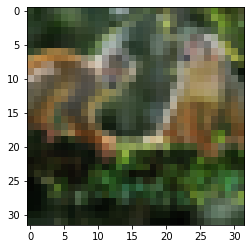

In [215]:
img, label = test_dataset[200]
if label == 0: display_name = "mantled_howler"
if label == 1: display_name = "patas_monkey"
if label == 2: display_name = "bald_uakari"
if label == 3: display_name = "japanese_macaque"
if label == 4: display_name = "pygmy_marmoset"
if label == 5: display_name = "white_headed_capuchin"
if label == 6: display_name = "silvery_marmoset"
if label == 7: display_name = "common_squirrel_monkey"
if label == 8: display_name = "black_headed_night_monkey"
if label == 9: display_name = "nilgiri_langur"
if predict_image(img, model) == "n0": predicted_name = "mantled_howler"
if predict_image(img, model) == "n1": predicted_name = "patas_monkey"
if predict_image(img, model) == "n2": predicted_name = "bald_uakari"
if predict_image(img, model) == "n3": predicted_name = "japanese_macaque"
if predict_image(img, model) == "n4": predicted_name = "pygmy_marmoset"
if predict_image(img, model) == "n5": predicted_name = "white_headed_capuchin"
if predict_image(img, model) == "n6": predicted_name = "silvery_marmoset"
if predict_image(img, model) == "n7": predicted_name = "common_squirrel_monkey"
if predict_image(img, model) == "n8": predicted_name = "black_headed_night_monkey"
if predict_image(img, model) == "n9": predicted_name = "nilgiri_langur"   
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))
print('Actual: ', display_name, 'Predicted: ', predicted_name)

In [216]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_loss': 5.477784156799316, 'val_acc': 0.458984375}

# Saving and loading the model

In [217]:
torch.save(model.state_dict(), 'cifar10-cnn.pth')

In [218]:
model2 = to_device(Cifar10CnnModel(), device)

In [219]:
model2.load_state_dict(torch.load('cifar10-cnn.pth'))

<All keys matched successfully>

In [220]:
evaluate(model2, test_loader)

{'val_loss': 5.477784156799316, 'val_acc': 0.458984375}

In [222]:
jovian.commit(project = project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ai/alanwarr/zero-to-gans-project


<IPython.core.display.Javascript object>

# Conclusions and Insights

Both ML techniques were more effective than random categorisation of 10%. Logistic regression reached around 35% accuracy and CNN around 45%.  A consideration is that Kaggle limits memory available, so the size of the images in CNN was limited.  So with more memory and full sized images, the accuracy may be further improved. 